In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':[12,8]})

import scipy.stats

# Loading data
df = pd.read_pickle('STING_DB.pkl')
df.head()

n_patient           id label  array  n_cores          sp    sp_date  turb  \
0          1  19870070301    OO    935      1.0   05-S-9869 2005-12-07     4   
1          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
2          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
3          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
4          1  19870070301    OO    931      3.0   05-S-4662 2005-06-10     3   

   histo      lesion  ... bcg_date mitomycin progression_stage_any  \
0      4   Non-tumor  ...      NaT         0                    No   
1      1   Low-grade  ...      NaT         0                    No   
2      1   Low-grade  ...      NaT         0                    No   
3      1   Low-grade  ...      NaT         0                    No   
4      2  High-grade  ...      NaT         0                    No   

  progression_stage_next recurrence_any  recurrence_next  \
0                    Yes            Yes              Yes   
1                     No            Yes               No   
2                     No            Yes               No   
3                     No            Yes               No   
4                     No            Yes               No   

   progression_grade_any  progression_grade_next   fu_months  sp_bcg_timing  
0                     No                     Yes  270.933333            Pre  
1                     No                      No  270.933333            Pre  
2                     No                      No  270.933333            Pre  
3                     No                      No  270.933333            Pre  
4                     No                      No  270.933333            Pre  

[5 rows x 64 columns]

# Clinical features

In [2]:
# Creating the dataframe containing clinical features, based on the full dataframe and grouped by the patient number ('n_patient')
# These are features that are identical for all the rows corresponding to the same patient
# Thus, using 'max' (or 'min', for what matters) makes sense for aggregating cases. 'max' is just a clever trick to obtaing the unique values for the corresponding patient
# This trick only works if there is only 1 unique value for each patient. Hence, the need to check using 'unique' before (which has been done, obviously)
df_clinical = df.groupby('n_patient').agg({'sex':max,'age_dx':max,'fu_months':max,'recurrence_any':max,'progression_grade_any':max,'progression_stage_any':max,'outcome':max})
df_clinical

sex     age_dx   fu_months recurrence_any progression_grade_any  \
n_patient                                                                       
1            Male  61.658333  270.933333            Yes                    No   
2            Male  53.591667  226.933333            Yes                   Yes   
3            Male  70.577778   35.500000            Yes                    No   
4          Female  69.355556  115.800000            Yes                    No   
5          Female  83.325000   14.400000            Yes                    No   
...           ...        ...         ...            ...                   ...   
57         Female  57.144444    5.266667            Yes                    No   
58           Male  71.525000    5.400000            Yes                    No   
59           Male  68.327778    2.100000            Yes                    No   
60           Male  74.963889    5.233333            Yes                    No   
61         Female  77.663889    3.433333            Yes                    No   

          progression_stage_any            outcome  
n_patient                                           
1                            No              Alive  
2                            No              Alive  
3                           Yes              Alive  
4                            No  Lost at follow-up  
5                           Yes  Lost at follow-up  
...                         ...                ...  
57                           No              Alive  
58                           No              Alive  
59                           No              Alive  
60                           No              Alive  
61                           No              Alive  

[61 rows x 7 columns]

## Sex

In [3]:
df_clinical['sex'].value_counts().to_frame()

sex
Male     41
Female   20

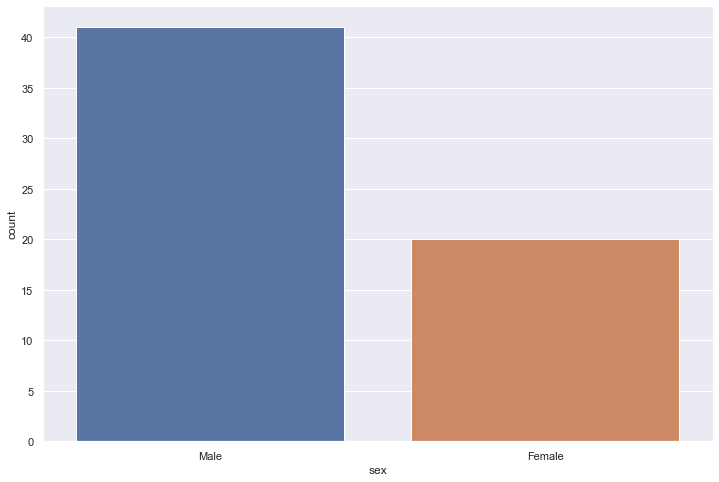

In [4]:
ax = sns.countplot(x='sex', data=df_clinical)

## Age at diagnosis, in years

In [5]:
df_clinical['age_dx'].describe().astype('int').to_frame()

age_dx
count      61
mean       68
std         9
min        46
25%        61
50%        68
75%        74
max        88

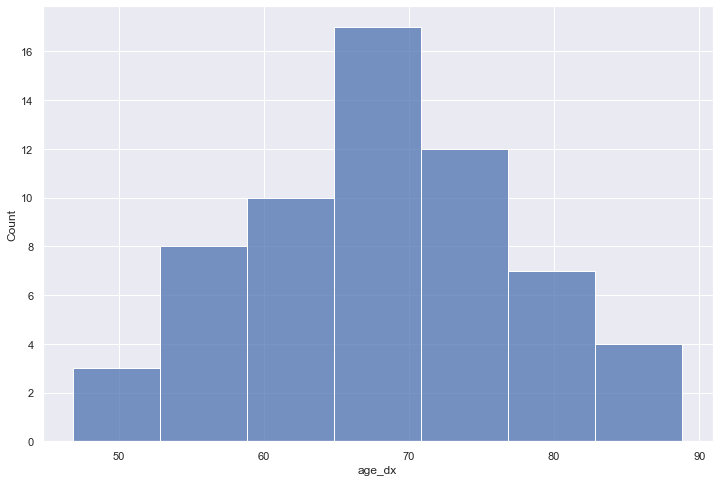

In [6]:
ax = sns.histplot(x='age_dx', data=df_clinical)

## Follow-up, in months

In [7]:
df_clinical['fu_months'].describe().astype('int').to_frame()

fu_months
count         61
mean          42
std           45
min            2
25%           14
50%           38
75%           49
max          270

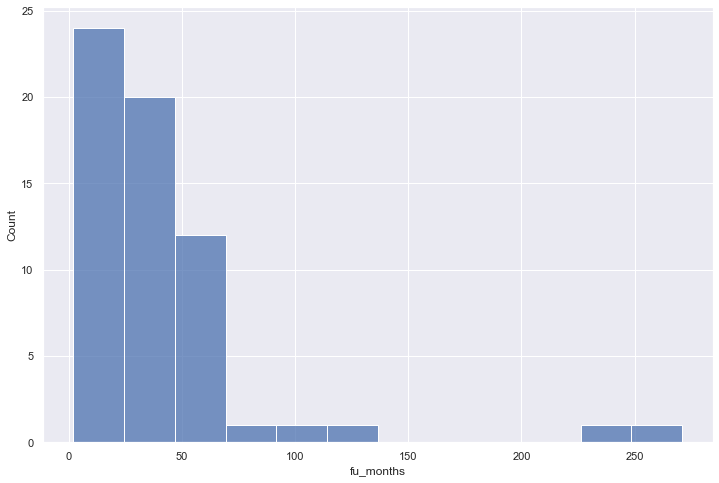

In [8]:
ax = sns.histplot(x='fu_months', data=df_clinical, bins=12)

## Tumor recurrence during follow-up

In [9]:
df_clinical['recurrence_any'].value_counts(sort=False).to_frame()

recurrence_any
Yes              52
No                9

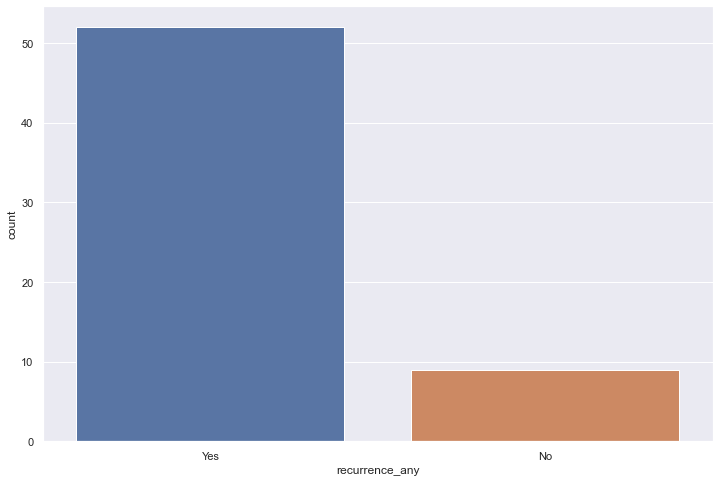

In [10]:
ax = sns.countplot(x='recurrence_any', data=df_clinical)

## Grade progression during follow-up

In [11]:
df_clinical['progression_grade_any'].value_counts(sort=False).to_frame()

progression_grade_any
Yes                      5
No                      56

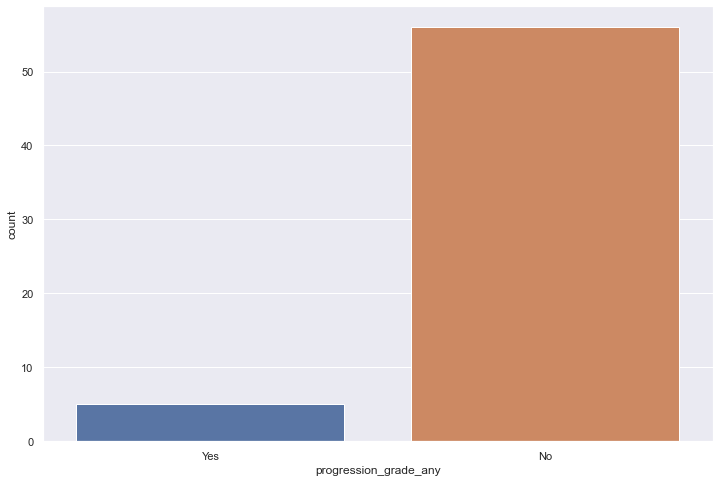

In [12]:
ax = sns.countplot(x='progression_grade_any', order=['Yes','No'], data=df_clinical)

## Stage progression during follow-up

In [13]:
df_clinical['progression_stage_any'].value_counts(sort=False).to_frame()

progression_stage_any
Yes                      6
No                      55

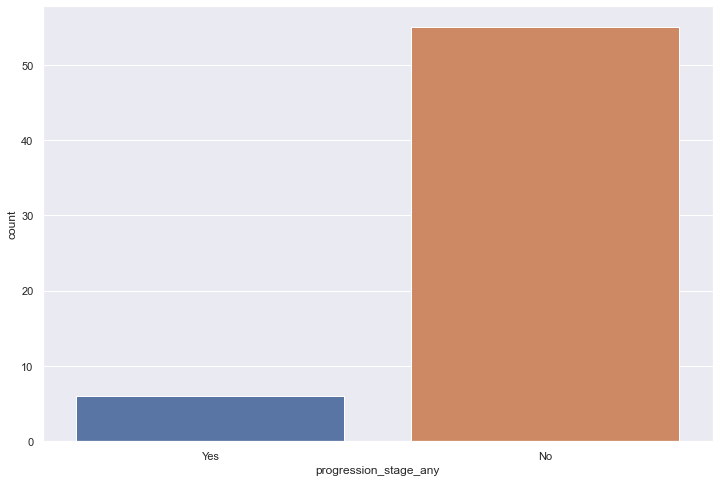

In [14]:
ax = sns.countplot(x='progression_stage_any', order=['Yes','No'], data=df_clinical)

## Outcome

In [15]:
df_clinical['outcome'].value_counts().to_frame()

outcome
Alive                   49
Lost at follow-up        6
Dead                     6

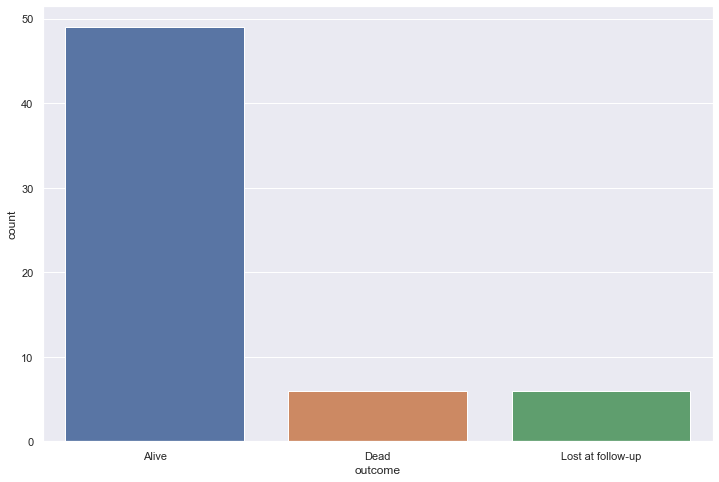

In [16]:
ax = sns.countplot(x='outcome', order=['Alive','Dead','Lost at follow-up'], data=df_clinical)

# Pathologic features

## Tumor grade

In [17]:
# This distribution considers all TMA spots across pathologic cases
# We chose to use this approach considering that a pathology case can have and usually has more than one grade
# Summarizing tumor grade by pathology case would be problematic then

df = df.astype({'lesion':'category'})
df['lesion'].cat.reorder_categories(['Non-tumor','CIS','Low-grade','High-grade','Invasive'], ordered=True, inplace=True)
df['lesion'].value_counts(sort=False).to_frame()

lesion
Non-tumor       47
CIS             20
Low-grade      116
High-grade     168
Invasive       108

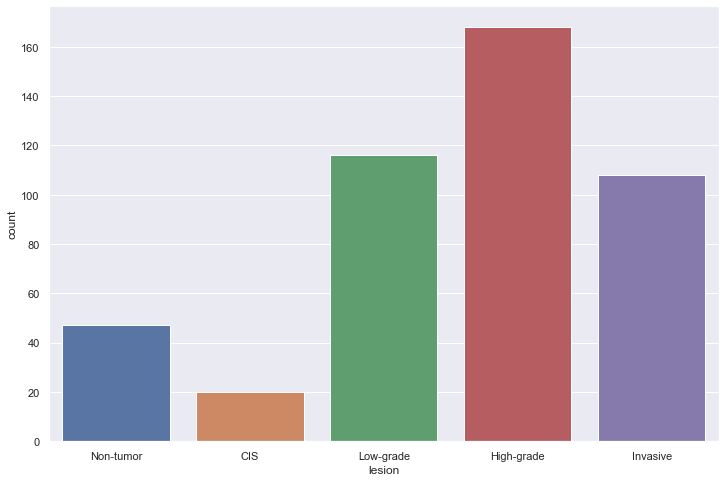

In [18]:
ax = sns.countplot(x='lesion', data=df)

## Tumor stage

In [19]:
# This distribution follows a similar approach than the one used previously (i.e., using all TMA spots)
# Also, this information derives from the pathology reports

df = df.astype({'pt':'category'})
df['pt'].cat.reorder_categories(['Tis','Ta','T1','T2'], ordered=True, inplace=True)
df['pt'].value_counts(sort=False).to_frame()

pt
Tis   18
Ta   217
T1   161
T2    21

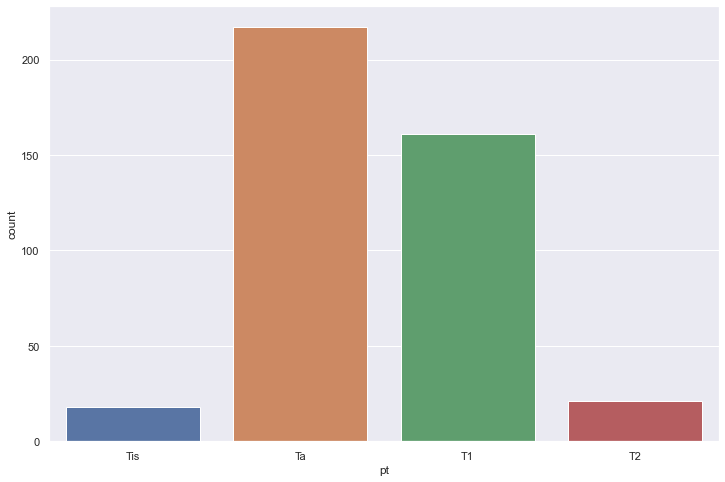

In [20]:
ax = sns.countplot(x='pt', data=df)

## Recurrence and progression

In [21]:
# For these distributions, we grouped TMA spots by pathology case
# This is the approach we will be using for comparing marker expression by outcomes later on
# All that was indicated for grouping TMA spots by clinical case is applicable here

df_path = df.groupby('sp').agg({'recurrence_any':max,'recurrence_next':max,'progression_grade_any':max,'progression_grade_next':max,'progression_stage_any':max,'progression_stage_next':max})
df_path

recurrence_any recurrence_next progression_grade_any  \
sp                                                                
01-S-10015            Yes              No                    No   
01-S-7500             Yes             Yes                    No   
01-S-9347             Yes             Yes                    No   
02-S-2362             Yes              No                    No   
02-S-9202             Yes             Yes                    No   
...                   ...             ...                   ...   
98-S-4588             Yes             Yes                    No   
98-S-4867             Yes             Yes                    No   
98-S-8041             Yes             Yes                    No   
99-S-5927             Yes              No                    No   
99-S-721              Yes              No                    No   

           progression_grade_next progression_stage_any progression_stage_next  
sp                                                                              
01-S-10015                     No                    No                     No  
01-S-7500                      No                    No                     No  
01-S-9347                      No                    No                     No  
02-S-2362                      No                    No                     No  
02-S-9202                      No                   Yes                     No  
...                           ...                   ...                    ...  
98-S-4588                      No                    No                     No  
98-S-4867                      No                   Yes                     No  
98-S-8041                      No                   Yes                    Yes  
99-S-5927                      No                    No                     No  
99-S-721                       No                   Yes                     No  

[141 rows x 6 columns]

### Tumor recurrence at next biopsy

In [22]:
df_path['recurrence_next'].value_counts().to_frame()

recurrence_next
Yes               72
No                50

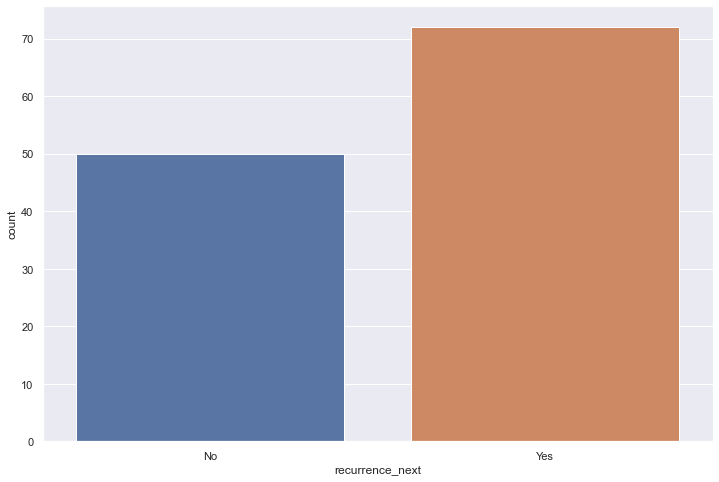

In [23]:
ax = sns.countplot(x='recurrence_next', data=df_path)

### Tumor recurrence at any biopsy

In [24]:
df_path['recurrence_any'].value_counts().to_frame()

recurrence_any
Yes             126
No               15

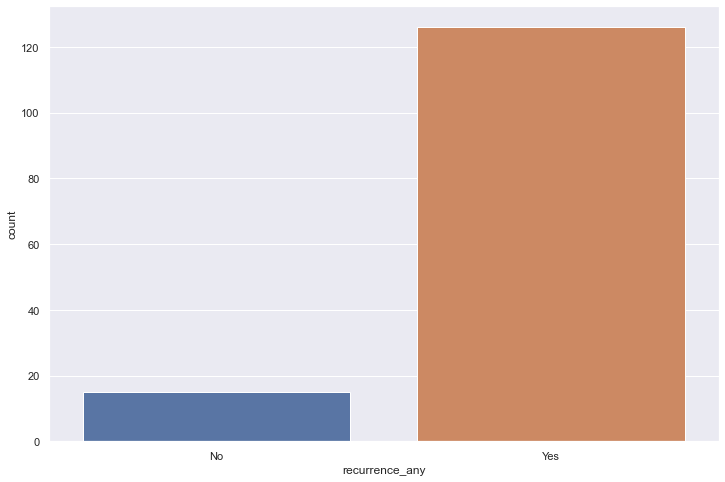

In [25]:
ax = sns.countplot(x='recurrence_any', data=df_path, order=['No','Yes'])

### Tumor grade progression at next biopsy

In [26]:
df_path['progression_grade_next'].value_counts().to_frame()

progression_grade_next
No                      117
Yes                       9

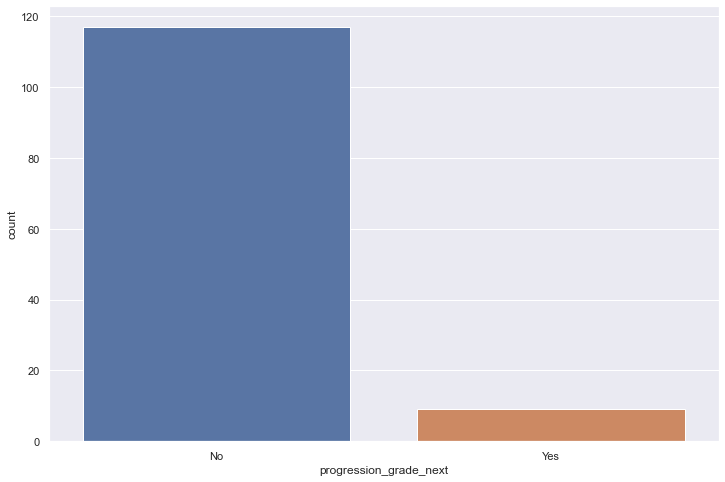

In [27]:
ax = sns.countplot(x='progression_grade_next', data=df_path)

### Tumor grade progression at any biopsy

In [28]:
df_path['progression_grade_any'].value_counts().to_frame()

progression_grade_any
No                     128
Yes                     13

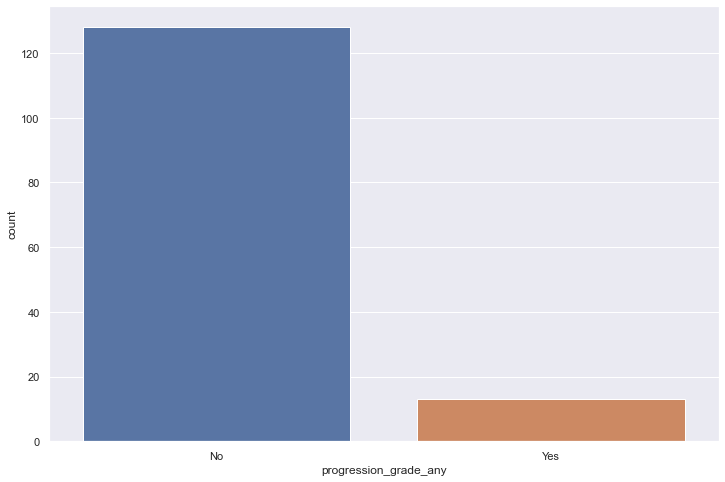

In [29]:
ax = sns.countplot(x='progression_grade_any', data=df_path)

### Tumor stage progression at next biopsy

In [30]:
df_path['progression_stage_next'].value_counts().to_frame()

progression_stage_next
No                      112
Yes                      10

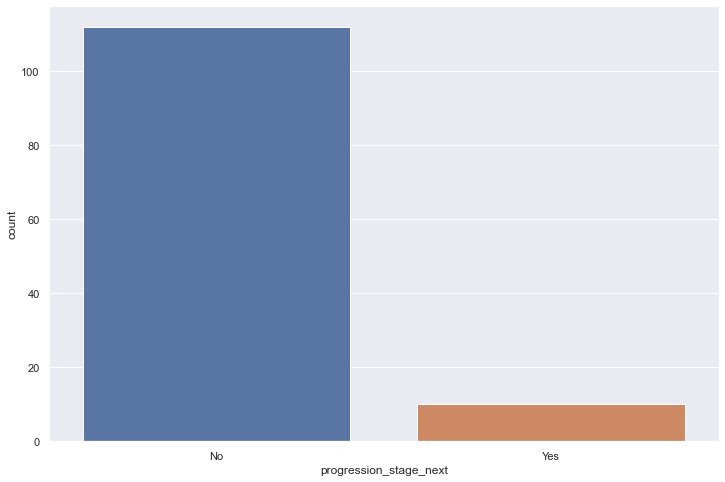

In [31]:
ax = sns.countplot(x='progression_stage_next', data=df_path)

### Tumor stage progression at any biopsy

In [32]:
df_path['progression_stage_any'].value_counts().to_frame()

progression_stage_any
No                     123
Yes                     18

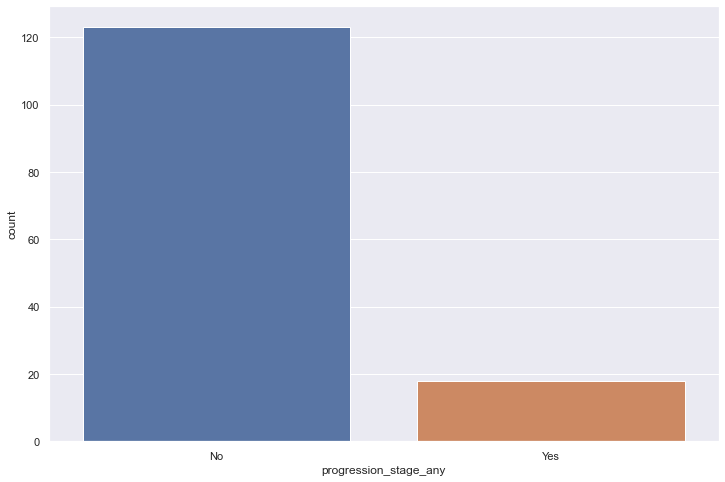

In [33]:
ax = sns.countplot(x='progression_stage_any', data=df_path)

# Marker features

## STING expression

count  mean  std  min  25%  50%  75%  max
sting_tumor    281    25   34    0    0   10   40  100

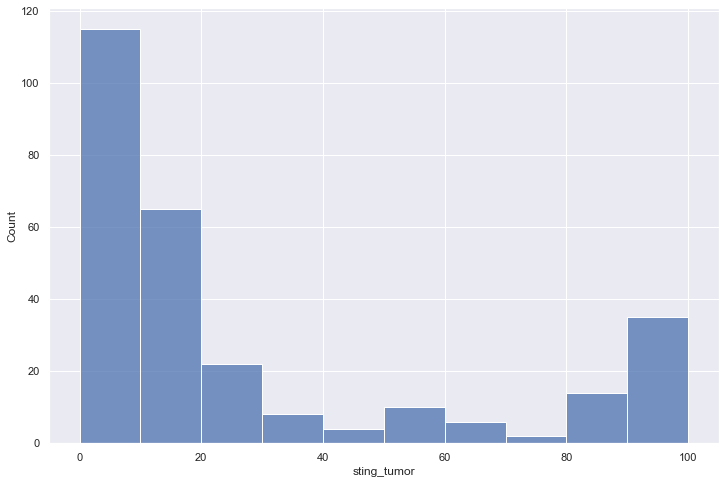

In [34]:
marker = 'sting_tumor'
ax = sns.histplot(x=marker, data=df)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
sting_tumor_h    284    54   89    0    0   10   52  300

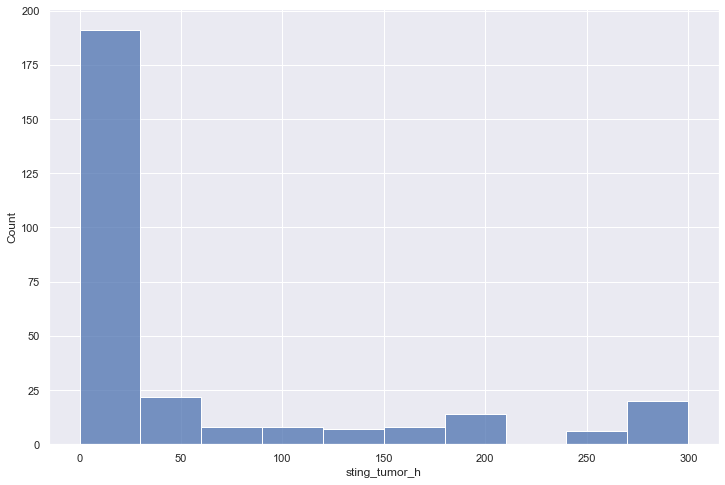

In [35]:
marker = 'sting_tumor_h'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
sting_inflammatory    163    94   17    0  100  100  100  100

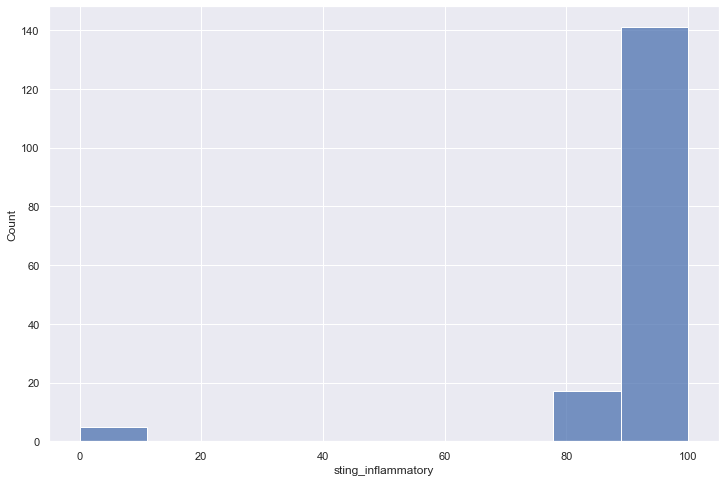

In [36]:
marker = 'sting_inflammatory'
ax = sns.histplot(x=marker, data=df)
display(df[marker].describe().astype(int).to_frame().transpose())

## cGAS expression

count  mean  std  min  25%  50%  75%  max
cgas_tumor    283    64   39    0   20   80  100  100

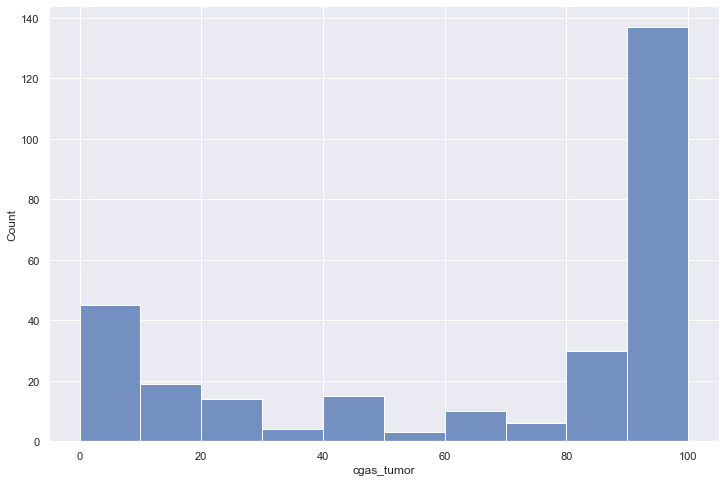

In [37]:
marker = 'cgas_tumor'
ax = sns.histplot(x=marker, data=df)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
cgas_tumor_h    284   153  113    0   30  170  277  300

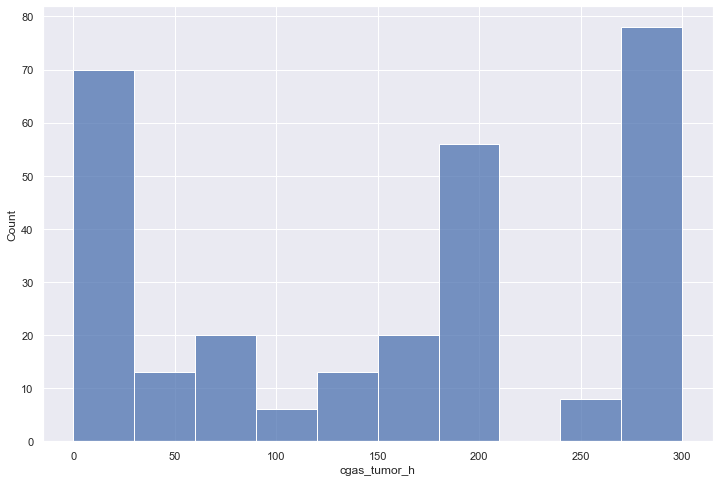

In [38]:
marker = 'cgas_tumor_h'
ax = sns.histplot(x=marker, data=df)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
cgas_inflammatory    160    12   18    0    0    5   10  100

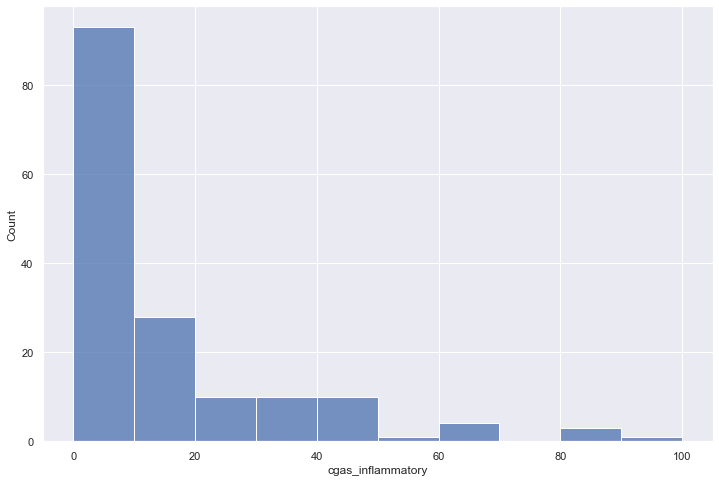

In [39]:
marker = 'cgas_inflammatory'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

## pIRF3 expression

count  mean  std  min  25%  50%  75%  max
pirf3_tumor    281    12   24    0    0    0    5  100

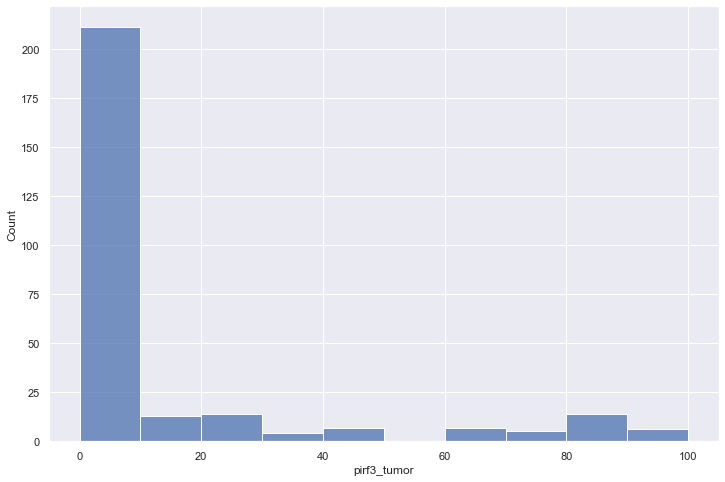

In [40]:
marker = 'pirf3_tumor'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
pirf3_tumor_h    281    15   35    0    0    0   10  200

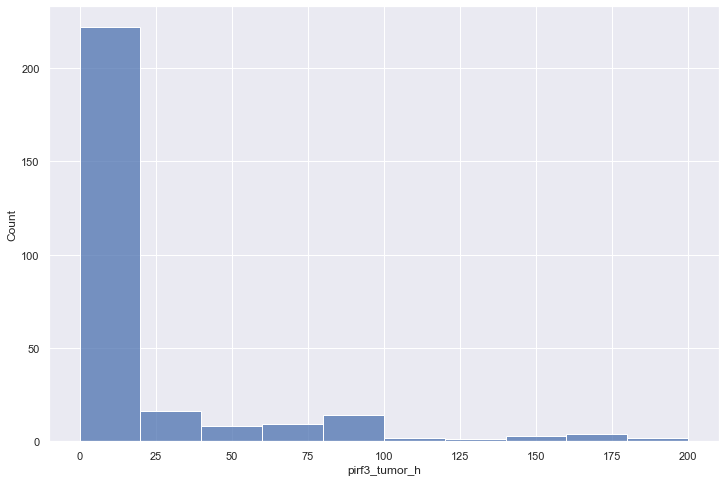

In [41]:
marker = 'pirf3_tumor_h'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
pirf3_inflammatory    160    14   26    0    0    0   10  100

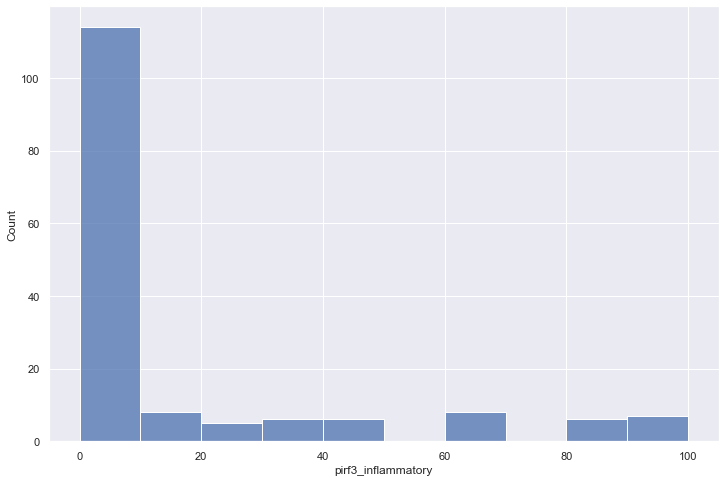

In [42]:
marker = 'pirf3_inflammatory'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

## PD-L1 expression

count  mean  std  min  25%  50%  75%  max
pdl1_tumor    355     3   15    0    0    0    0  100

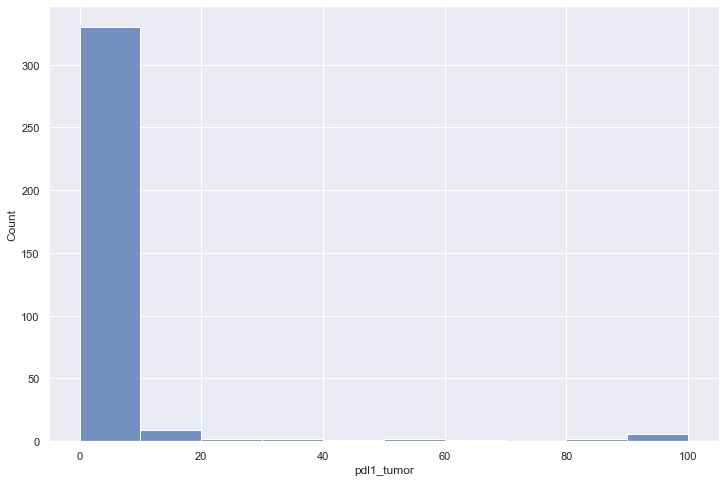

In [43]:
marker = 'pdl1_tumor'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
pdl1_tumor_h    360     5   23    0    0    0    1  200

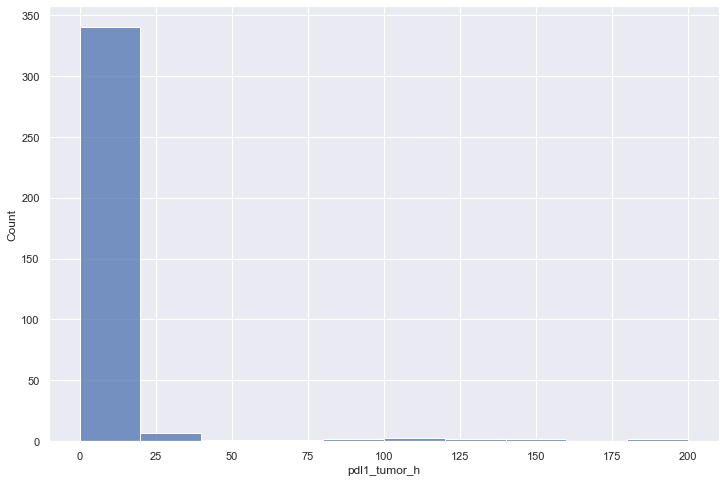

In [44]:
marker = 'pdl1_tumor_h'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
pdl1_inflammatory    246     9   16    0    0    1   10   80

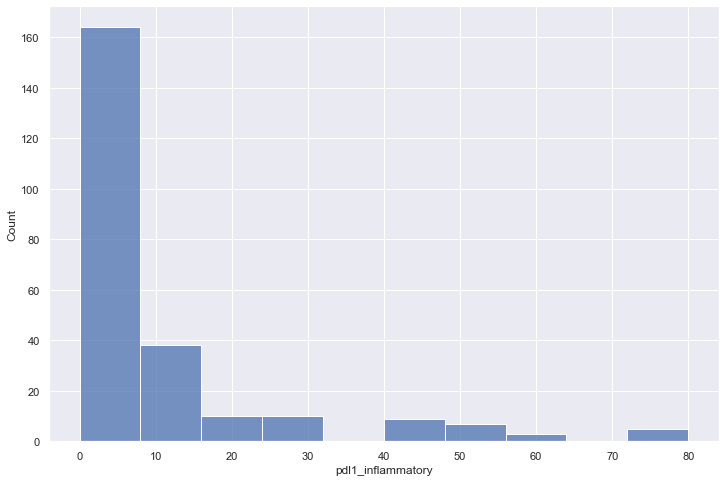

In [45]:
marker = 'pdl1_inflammatory'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

## CD8 and CD8-Ki67 expression

count  mean  std  min  25%  50%  75%  max
cd8_intratumoral    310     8   16    0    0    2   10  155

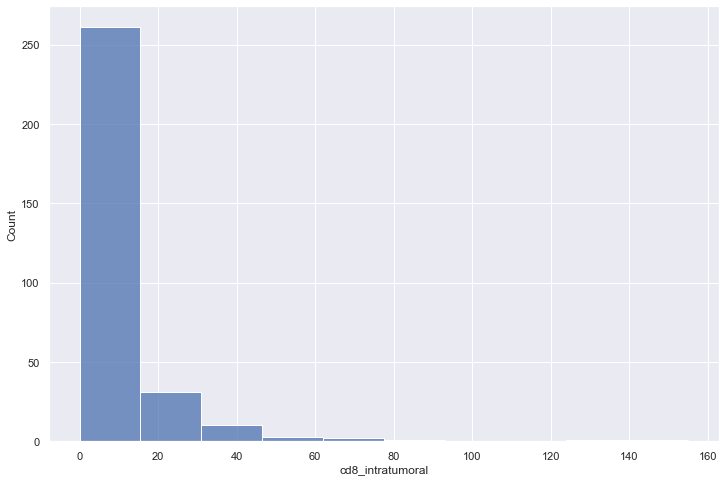

In [46]:
marker = 'cd8_intratumoral'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
cd8_peritumoral    383    24   39    0    1    7   31  216

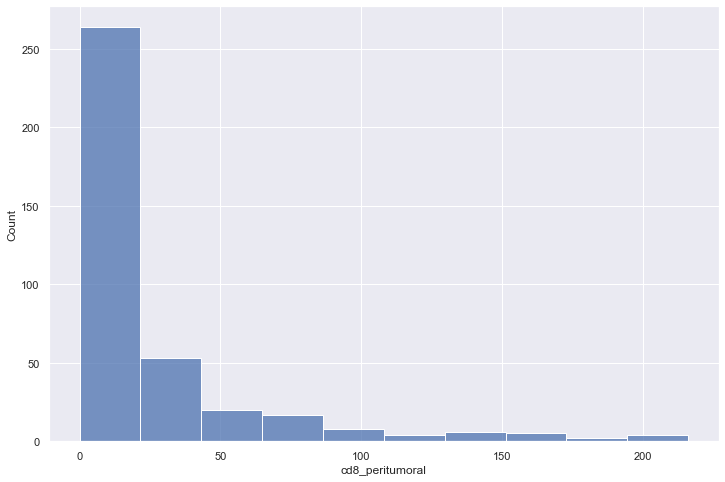

In [47]:
marker = 'cd8_peritumoral'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
cd8ki67_intratumoral    307     0    1    0    0    0    0   10

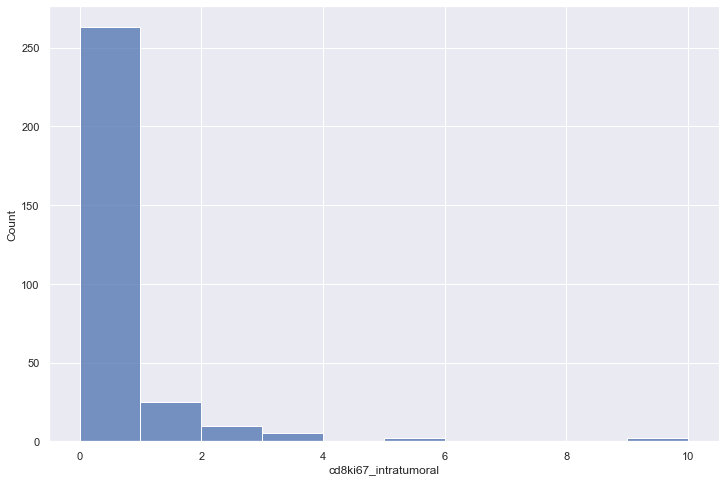

In [48]:
marker = 'cd8ki67_intratumoral'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
cd8ki67_peritumoral    371     0    0    0    0    0    0    4

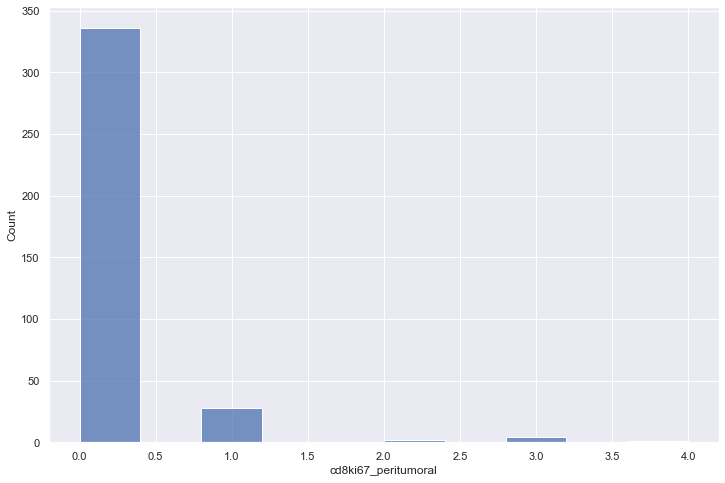

In [49]:
marker = 'cd8ki67_peritumoral'
ax = sns.histplot(x=marker, data=df, bins=10)
display(df[marker].describe().astype(int).to_frame().transpose())

count  mean  std  min  25%  50%  75%  max
ki67_tumor    311    29   20    0   15   25   40  100

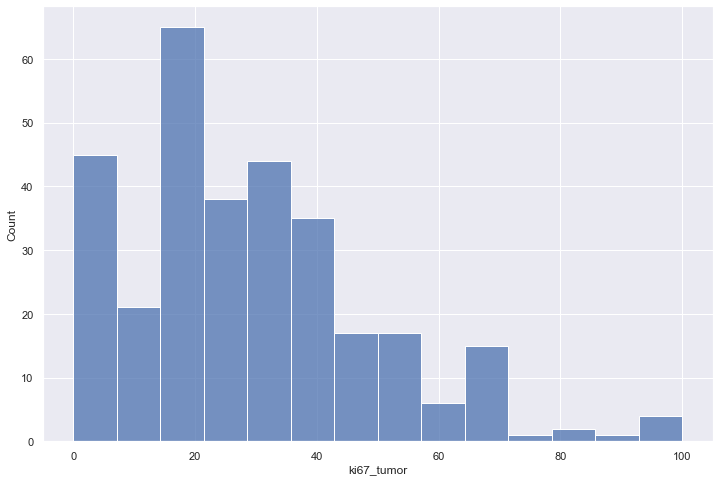

In [50]:
marker = 'ki67_tumor'
ax = sns.histplot(x=marker, data=df)
display(df[marker].describe().astype(int).to_frame().transpose())